##Підготовчий етап
Імпортуйте необхідні бібліотеки.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

Завантажимо надані у файли з вихідними даними. Ознайомтеся з ними.

In [3]:
df = pd.read_csv('https://github.com/gardenappl/uni/blob/main/semester7/nn/howpop_train.csv?raw=true')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134137 entries, 0 to 134136
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   url               134137 non-null  object 
 1   domain            134137 non-null  object 
 2   post_id           134137 non-null  int64  
 3   published         134137 non-null  object 
 4   author            97657 non-null   object 
 5   flow              97048 non-null   object 
 6   polling           134137 non-null  bool   
 7   content_len       134137 non-null  int64  
 8   title             134137 non-null  object 
 9   comments          134137 non-null  int64  
 10  favs              134137 non-null  int64  
 11  views             134137 non-null  int64  
 12  votes_plus        133566 non-null  float64
 13  votes_minus       133566 non-null  float64
 14  views_lognorm     134137 non-null  float64
 15  favs_lognorm      134137 non-null  float64
 16  comments_lognorm  13

Виведіть дані так як показано на зображенні.

In [5]:
df.head().transpose()

,0,1,2,3,4
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/,https://habrahabr.ru/post/18291/,https://geektimes.ru/post/18294/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru,geektimes.ru
post_id,18284,18285,18286,18291,18294
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00,2008-01-02 01:32:00,2008-01-02 14:34:00
author,@Tapac,@DezmASter,@DezmASter,@Taoorus,@dennydo
flow,develop,design,design,design,NaN
polling,False,False,False,False,False
content_len,4305,7344,8431,5662,3706
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ...","Сглаживание шрифтов, и субпиксельная отрисовка",Почему мне не нравится iPhone
comments,0,1,47,102,230


Видаліть данні, що завершуються на _lognom

In [6]:
for i in df:
  if (i.endswith('_lognorm')):
    df.pop(i)

Застосуйте для виводу статистичної інформації функцію
DataFrame.describe()

In [7]:
df.describe()

,post_id,content_len,comments,favs,views,votes_plus,votes_minus
count,134137.000000,134137.000000,134137.000000,134137.000000,1.341370e+05,133566.000000,133566.000000
mean,181307.054265,7516.929699,39.625994,71.999866,1.663101e+04,35.536888,8.050035
std,81766.350702,8724.771640,62.398958,145.854135,3.147982e+04,42.461073,11.398282
min,18284.000000,1.000000,0.000000,0.000000,3.000000e+00,0.000000,0.000000
25%,115565.000000,2179.000000,7.000000,8.000000,2.100000e+03,11.000000,2.000000
50%,182666.000000,4949.000000,19.000000,27.000000,7.600000e+03,22.000000,5.000000
75%,257401.000000,9858.000000,48.000000,78.000000,1.870000e+04,45.000000,10.000000
max,314088.000000,352471.000000,2266.000000,8718.000000,1.730000e+06,1466.000000,445.000000


Стовпець published (час публікації) містить рядки. Щоб ми могли працювати
з цими даними як з датою/ часом публікації, перетворіть їх до типу datetime:

In [8]:
df['published'] = df.published.astype('datetime64')

Створіть кілька стовпців на основі даних про час публікації:

In [9]:
df['year'] = [d.year for d in df.published]
df['month'] = [d.month for d in df.published]
df['dayofweek'] = [d.isoweekday() for d in df.published]
df['hour'] = [d.hour for d in df.published]

# Завдання

In [10]:
df.head()

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,year,month,dayofweek,hour
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,2008,1,2,18
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,2008,1,2,18
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,2008,1,2,18
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0,2008,1,3,1
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0,2008,1,3,14


In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = [10, 10]

В якому році та місяці було найбільше публікацій?
* Березень 2016
* Березень 2015
* Квітень 2015
* Квітень 2016

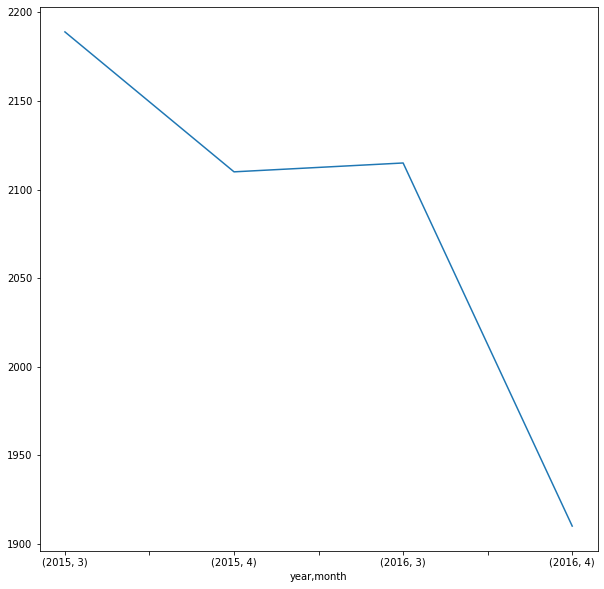

In [13]:
df[(df['year'] >= 2015) & df['month'].between(3, 4)].groupby(['year', 'month'])['post_id'].count().plot()

**Найбільше публікацій у березні 2015.**

Проаналізуйте публікації в місяці з попереднього питання. Оберіть один або кілька
варіантів.

* Один або кілька днів сильно виділяються із загальної картини
* На Хабрі (habrahabr.ru) завжди більше статей, ніж на Гіктаймсі (geektimes.ru)
* По суботах на Гіктаймсі та Хабрі публікують приблизно однакове число статей

In [14]:
count_by_day_site = df[(df['year'] == 2015) & (df['month'] == 3)].groupby(['dayofweek', 'domain'])['post_id'].count()

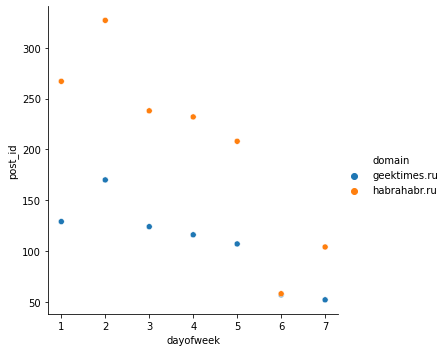

In [15]:
sns.relplot(data=count_by_day_site, x="dayofweek", y=count_by_day_site, hue="domain")

* **Субота і неділя виділяються**
* **На Хабрі завжди більше, можливо за вийнятком суботи**
* **В суботу і там, і там приблизно однаково**


Коли найкраще опублікувати статтю? Оберіть один або кілька варіантів.

* Найбільше переглядів набирають статті, опубліковані о 12 годині дня
* В опублікованих о 10 ранку постів найбільше коментарів
* Найбільше переглядів набирають статті, опубліковані о 6 годині ранку
* Максимальна кількість коментарів на Гіктаймсі набрала стаття, опублікована о 9
годині вечора
* На Хабрі денні статті коментують частіше, ніж вечірні

In [16]:
views_by_hour = df.groupby(['hour', 'domain'])['views'].sum()

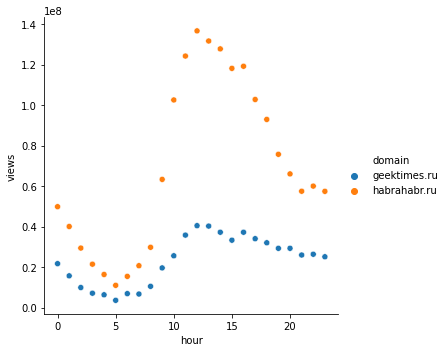

In [17]:
sns.relplot(data=views_by_hour, x='hour', y=views_by_hour, hue='domain')

* **Найбільше переглядів набирають статті, опубліковані о 12 годині дня**

In [18]:
comments_by_hour = df.groupby(['hour', 'domain'])['comments'].sum()

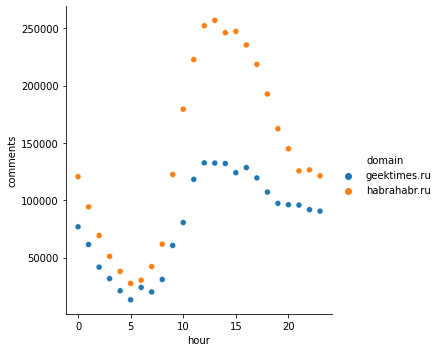

In [19]:
sns.relplot(data=comments_by_hour, x='hour', y=comments_by_hour, hue='domain')

* **На Хабрі денні статті коментують частіше, ніж вечірні**

In [20]:
max_comments_by_hour = df.groupby(['hour', 'domain'])['comments'].max()

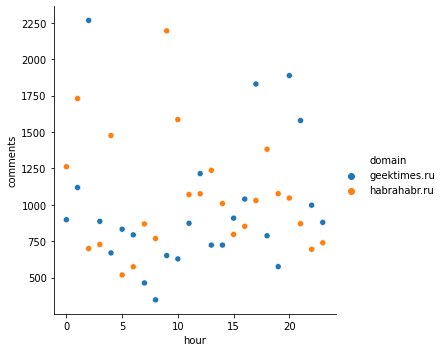

In [21]:
sns.relplot(data=max_comments_by_hour, x='hour', y=max_comments_by_hour, hue='domain')

Кого з топ-20 авторів найчастіше мінусують?

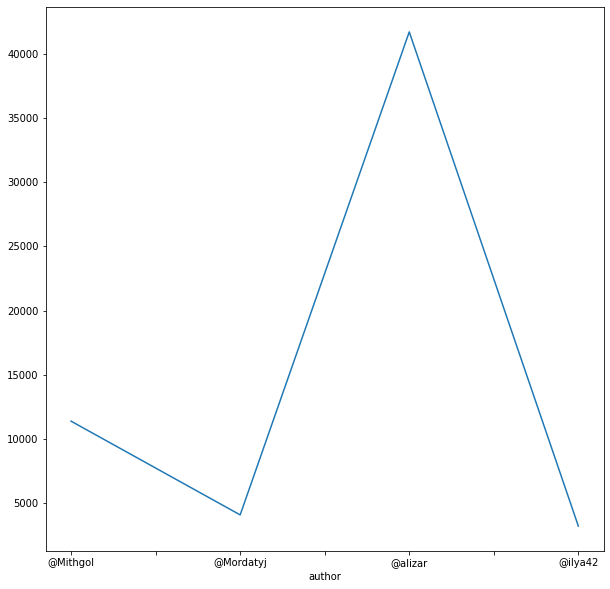

In [22]:
authors = ['@Mordatyj', '@Mithgol', '@alizar', '@ilya42']
minus_by_author = df[df['author'].isin(authors)].groupby('author')['votes_minus'].sum().plot()

**Найчастіше мінусують @alizar**

Порівняйте суботи і понеділки. Чи правда, що по суботах автори пишуть в основному
вдень, а по понеділках – в основному ввечері?

In [23]:
count_by_day_hour = df[df['dayofweek'].isin([1, 6])].groupby(['hour', 'dayofweek'])['post_id'].count()

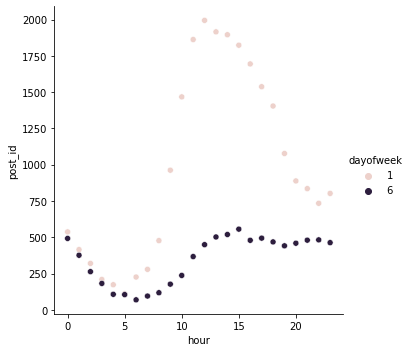

In [24]:
sns.relplot(data=count_by_day_hour, x='hour', y=count_by_day_hour, hue='dayofweek')

**В понеділок пишуть в основному вдень. У суботу пишуть як і вдень, так і ввечері**